# Data Science exercise
Anupriya Kushwanshi
anupriya.kushwanshi@gmail.com

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd



orders = pd.read_csv("C:/Users/anupr/Documents/klaviyo_screening_exercise_orders_v201810_kushwanshi_anupriya.csv",index_col=False)
orders = orders.sort_values(by=['customer_id'])

print(orders.head().to_csv(sep='\t', index=False))


customer_id	gender	date	value	predicted_gender
1000	0	1/1/2017 0:11	198.5	1
1001	0	1/1/2017 0:29	338.0	1
1002	1	1/1/2017 1:30	733.0	1
1002	1	2/19/2017 21:35	176.0	1
1002	1	1/23/2017 4:33	148.6	1



In any dataset, it is a good practice to check for duplicates. Most of the databases around the world are not very clean (or even automated). It depends where the data is coming from. If the system requires the database administrator to populate one or more columns manually, there are very high chabces of redundancy and accuracy.
We need all the columns in the dataset for further analysis, hence, I removed duplicates based on all the columns. Removing duplicates only on customer is not ideal as we would lose the information like the frequency of shopping.


In [2]:
#studying the number of records

old_length = len(orders)
old_length

13471

In [3]:
#removing the duplicate values

orders_1 = orders.drop_duplicates(keep=False)
new_length = len(orders_1)
new_length

13467

In [4]:
print("There were "+ str(old_length-new_length) + " duplicate rows in the dataframe")


There were 4 duplicate rows in the dataframe


In [5]:
#first 5 records

orders_1.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,1/1/2017 0:11,198.5,1
1,1001,0,1/1/2017 0:29,338.0,1
2,1002,1,1/1/2017 1:30,733.0,1
1742,1002,1,2/19/2017 21:35,176.0,1
928,1002,1,1/23/2017 4:33,148.6,1


In [6]:
#reading the datatype of the dataframe

orders_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13467 entries, 0 to 13469
Data columns (total 5 columns):
customer_id         13467 non-null int64
gender              13467 non-null int64
date                13467 non-null object
value               13467 non-null float64
predicted_gender    13467 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 631.3+ KB


A) Assemble a dataframe with one row per customer and the following columns:
    * customer_id
    * gender
    * most_recent_order_date
    * order_count (number of orders placed by this customer)
   Sort the dataframe by customer_id ascending and display the first 10 rows.

Creating a new column to store the order count. To count the order I will count the occurrence of customer id.

In [7]:
#Grouping the table as per different aggregate functions to be applied on different columns

grouped_table=orders_1.groupby('customer_id').aggregate({ 'gender':np.mean, 'date':np.max, 'customer_id':np.count_nonzero})
grouped_table = grouped_table.rename(columns={"customer_id": "order_count", "date":"most_recent_order_date"})

#sorting the dataframe
grouped_table = grouped_table.sort_values(by=['customer_id'], ascending=False)
grouped_table.head(10)

,gender,most_recent_order_date,order_count
customer_id,,,
9813,0,12/31/2017 23:11,1
9812,0,12/31/2017 23:01,1
9811,1,12/31/2017 22:24,1
9810,1,12/31/2017 22:16,1
9809,1,12/31/2017 21:39,1
9808,1,12/31/2017 21:39,1
9807,0,12/31/2017 21:24,1
9806,1,12/31/2017 21:08,1
9805,1,12/31/2017 20:07,1


In [8]:
#Changing the datetime format to date

grouped_table["most_recent_order_date"] = pd.to_datetime(grouped_table["most_recent_order_date"]).dt.date
grouped_table.head(10)


,gender,most_recent_order_date,order_count
customer_id,,,
9813,0,2017-12-31,1
9812,0,2017-12-31,1
9811,1,2017-12-31,1
9810,1,2017-12-31,1
9809,1,2017-12-31,1
9808,1,2017-12-31,1
9807,0,2017-12-31,1
9806,1,2017-12-31,1
9805,1,2017-12-31,1


B) Plot the count of orders per week for the store.


In [15]:
#adding a column for weeks

orders_1['Week_Number'] = pd.to_datetime(orders_1['date']).dt.strftime('%U')
orders_1['Week_Number']
orders_2 = orders_1.sort_values(by=['customer_id'])
orders_2.head()

,customer_id,gender,date,value,predicted_gender,Week_Number
0,1000,0,1/1/2017 0:11,198.5,1,01
1,1001,0,1/1/2017 0:29,338.0,1,01
2,1002,1,1/1/2017 1:30,733.0,1,01
1742,1002,1,2/19/2017 21:35,176.0,1,08
928,1002,1,1/23/2017 4:33,148.6,1,04


In [41]:
grouped_table_week=orders_2.groupby('Week_Number', as_index=False).aggregate({ 'customer_id':np.count_nonzero})
grouped_table_week = grouped_table_week.rename(columns={"customer_id": "order_count_wk"})
grouped_table_week = pd.DataFrame(grouped_table_week)
grouped_table_week.head()


,Week_Number,order_count_wk
0,01,175
1,02,259
2,03,356
3,04,287
4,05,209


Average number of orders :254.0943396226415


<function matplotlib.pyplot.show(*args, **kw)>

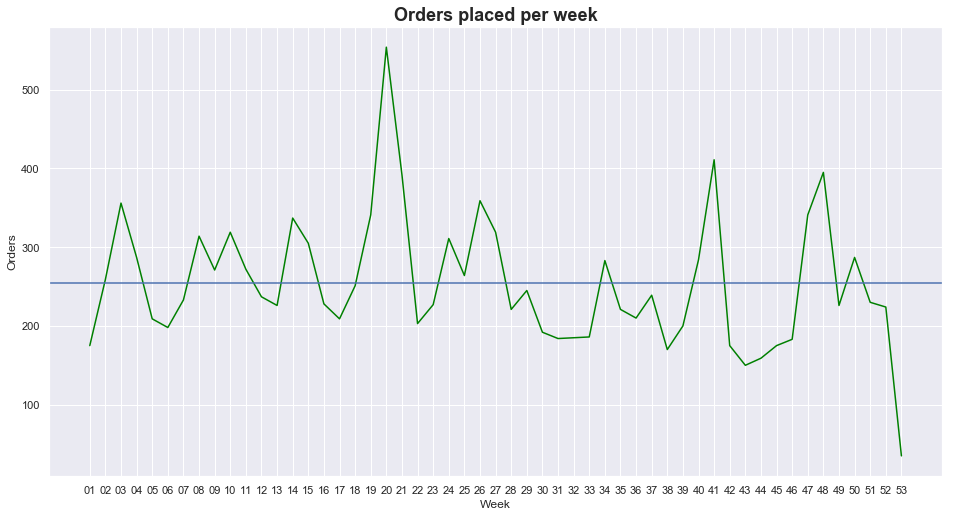

In [258]:
#plotting order count per week

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(16,8.27)})
ax = sns.lineplot(x="Week_Number", y="order_count_wk", data=grouped_table_week, color='green')
ax.set(xlabel='Week', ylabel='Orders')
mean = grouped_table_week["order_count_wk"].mean()
print("Average number of orders :"+str(mean))
plt.title('Orders placed per week',  weight='bold').set_fontsize('18')
#adding average line
ax.axhline(mean)
ax.text
plt.show

In [153]:
# five largest values in column order count 
max_5 = grouped_table_week.nlargest(5, ['order_count_wk'])
max_5

,Week_Number,order_count_wk
19,20,554
40,41,411
47,48,395
20,21,392
25,26,359


In [152]:
# five smallest values in column order count 
min_5 = grouped_table_week.nsmallest(5, ['order_count_wk'])
min_5

,Week_Number,order_count_wk
52,53,35
42,43,150
43,44,159
37,38,170
0,01,175


In [180]:
#joining max and min 5 orders
max_min_5 = max_5.append(min_5).sort_values(by = "order_count_wk", ascending=False)
max_min_5

,Week_Number,order_count_wk
19,20,554
40,41,411
47,48,395
20,21,392
25,26,359
0,01,175
37,38,170
43,44,159
42,43,150
52,53,35


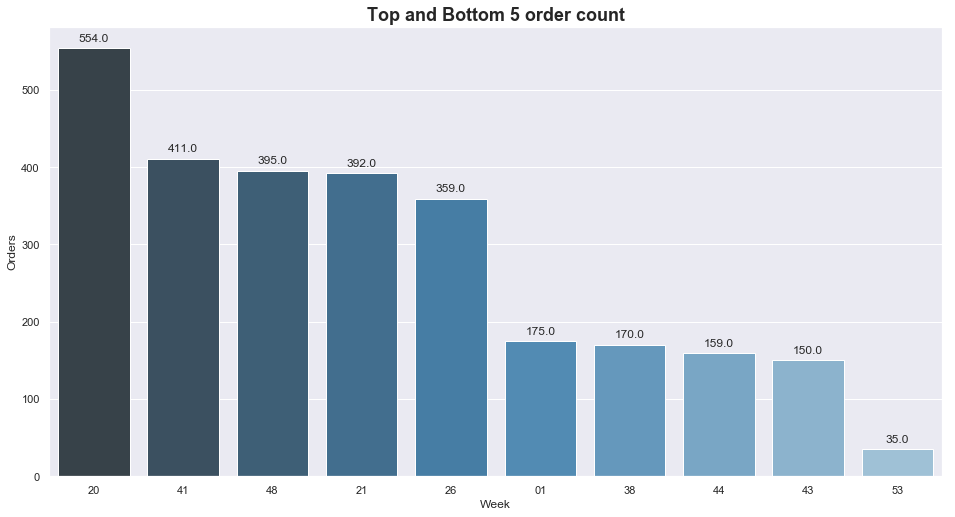

In [184]:

ax = sns.barplot(x="Week_Number", y="order_count_wk", data=max_min_5, color='green', order = max_min_5["Week_Number"], palette=("Blues_d"))
ax.set(xlabel='Week', ylabel='Orders')
plt.title('Top and Bottom 5 order count',  weight='bold').set_fontsize('18')

# annotate bars with values 
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), 
                                 (p.get_x()+p.get_width()/2., p.get_height()), 
                                 ha='center', va='center', xytext=(0, 10), 
                                 textcoords='offset points')

Week #20 has the highest while week 53 has the lowest orders. 

C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?


In [243]:
# filtering the records based on gender

gender_0 =  orders_1[orders_1['gender']==0]
gender_1 =  orders_1[orders_1['gender']==1]
gender_0.head()


,customer_id,gender,date,value,predicted_gender,Week_Number
0,1000,0,1/1/2017 0:11,198.50,1,01
1,1001,0,1/1/2017 0:29,338.00,1,01
4,1004,0,1/1/2017 3:11,508.00,1,01
7,1007,0,1/1/2017 15:59,168.00,0,01
57,1008,0,1/3/2017 19:23,121.98,0,01


In [245]:
#mean order value for gender 0

print("Mean order value for gender 0 = "+str(round(gender_0['value'].mean(),12))+" and standard deviation ="+str(round(gender_0['value'].std(),12)))
print("Mean order value for gender 1 = "+str(round(gender_1['value'].mean(),12))+" and standard deviation ="+str(round(gender_1['value'].std(),12)))

Mean order value for gender 0 = 363.602271718218 and standard deviation =396.238949457487
Mean order value for gender 1 = 350.675019374069 and standard deviation =377.556060303573


In [246]:
#Difference between the mean value
print("Difference between the mean values of gender 1 and 0 = "+str(round(gender_0['value'].mean()-gender_1['value'].mean(),12)))

Difference between the mean values of gender 1 and 0 = 12.92725234415


C:\Users\anupr\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\anupr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Statistics=0.656, p=0.000
The data is not normally distributed


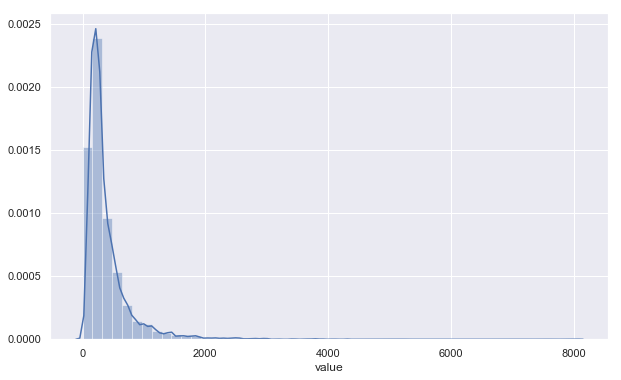

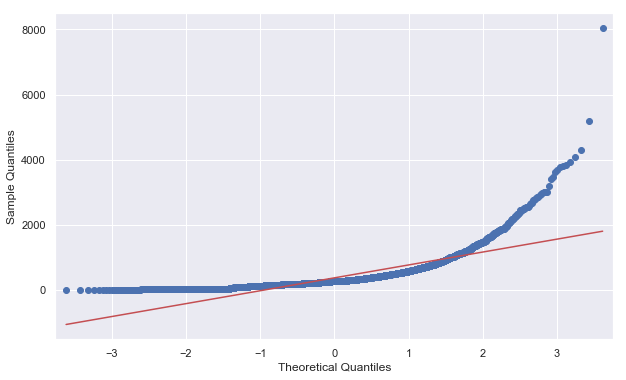

In [247]:
#Distribution of gender_0
from scipy.stats import shapiro

# Statistical Normality Tests – Shapiro-Wilk Test
stat, p = shapiro(gender_0['value'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Normal Distribution')
else:
    print('The data is not normally distributed')
sns.set(rc={'figure.figsize':(10,6)})

sns.distplot(gender_0['value']);
# q-q plot
from statsmodels.graphics.gofplots import qqplot

qqplot(gender_0['value'], line='s')
plt.show()


C:\Users\anupr\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\anupr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Statistics=0.641, p=0.000
The data is not normally distributed


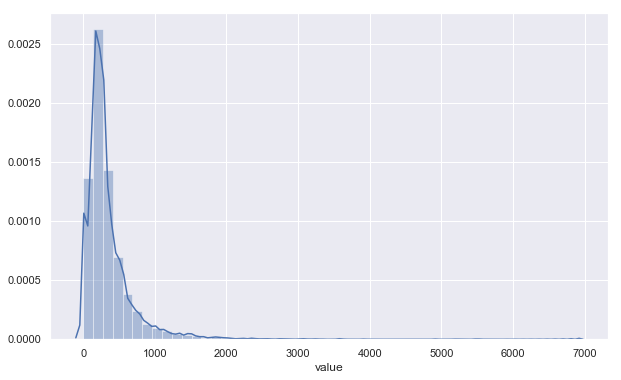

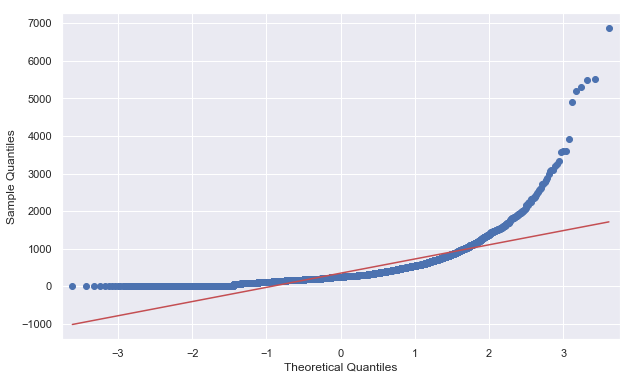

In [248]:
#Distribution of gender_1
from scipy.stats import shapiro

# Statistical Normality Tests – Shapiro-Wilk Test
stat, p = shapiro(gender_1['value'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Normal Distribution')
else:
    print('The data is not normally distributed')
sns.set(rc={'figure.figsize':(10,6)})

sns.distplot(gender_1['value']);
# q-q plot
from statsmodels.graphics.gofplots import qqplot

qqplot(gender_1['value'], line='s')
plt.show()

To find out if the difference is significant, I would use a hypothesis test. For a significance level of 5%, if the p-value falls lower than 5%, the null hypothesis is invalidated. However, it can be seen that the distribution is highly skewed. We would be concerned about using the t-test for such data, as the t-test assumes the data is normally distributed. Although our sample size is big enough, the skewness can be seen. 
The t-test is invalid for small samples(A sample size of 30 serves as a rule of thumb) from non-normal distributions, but it is valid for large samples from non-normal distributions. I chose to go with Welch's t-test. 


Welch’s t-test is a nonparametric univariate test that tests for a significant difference between the mean of two unrelated groups
Null hypothesis (H0): there is no significant difference between the means of the two samples
Alternative hypothesis (HA): there is a significant difference between the means of the two samples
If the p-value is less 0.05, we can reject the null hypothesis.



In [253]:
#Welch's t-test

from scipy import stats
stats.ttest_ind(gender_1['value'], gender_0['value'])


Ttest_indResult(statistic=-1.9379829852367747, pvalue=0.052646176919475346)

The p-value is significant, therefore we can reject the null hypothesis in support of the alternative. The difference is significant.



D) Assuming a single gender prediction was made for each customer, generate a confusion matrix for predicted gender. What does the confusion matrix tell you about the quality of the predictions?


In [294]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 


confusion_matrix = pd.crosstab(orders_1["gender"], orders_1["predicted_gender"], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)


Predicted     0     1
Actual               
0          3347  3410
1          1463  5247


To see if the accuracy is a good measure, I checked the ditribution of 1 and 0. For example, if out of 100 records, there are 90 1s and 10 0s, even when the gender of all the 0s are misclassified as 1 the accuracy would still be 90%. But in reality, the model would not be a good one as it has 100% rate of mislassifying the gender 0.

In [314]:
#frequency of each gender
gender_count=orders_1.groupby('gender', as_index=False).aggregate({ 'customer_id':np.count_nonzero})
gender_count = gender_count.rename(columns={"customer_id": "count"})

gender_count

,gender,count
0,0,6757
1,1,6710


In [354]:
#ratio of counts
6757/6710

1.0070044709388972

The ratio is almost 1. Hence, accurracy is a good measure.

In [358]:
#Accuracy %
#(TP + TN) / (TP + TN + FP + FN)

((3347+5247)/(3347+3410+1463+5247))*100

63.815252097720354

The predicted value is 63% accurate which is not considered very good. A score of 80% and above would have been acceptable in this scenario.